In [1]:
import pandas as pd
import os

path = r"D:\Github Bootcamp\bootcampda8\uber-traffic"

files = os.listdir(path)
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [2]:
files.remove("uber-raw-data-janjune-15.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + "/" + file) # slash untuk mengakses file
    final = pd.concat([df, final])

final

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [4]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [5]:
df = final.copy()
df = df.head(50000) # agar data yang diakses hanya 50000 rows
df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
49995,9/3/2014 15:59:00,40.7429,-73.9357,B02598
49996,9/3/2014 15:59:00,40.7515,-73.9938,B02598
49997,9/3/2014 16:00:00,40.7651,-73.9750,B02598
49998,9/3/2014 16:00:00,40.7131,-73.9973,B02598


In [6]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
49995,2014-09-03 15:59:00,40.7429,-73.9357,B02598
49996,2014-09-03 15:59:00,40.7515,-73.9938,B02598
49997,2014-09-03 16:00:00,40.7651,-73.9750,B02598
49998,2014-09-03 16:00:00,40.7131,-73.9973,B02598


In [7]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [8]:
df["weekday"] = df["Date/Time"].dt.day_name()
df["day"] = df["Date/Time"].dt.day
df["minute"] = df["Date/Time"].dt.minute
df["month"] = df["Date/Time"].dt.month
df["hour"] = df["Date/Time"].dt.hour
df["year"] = df["Date/Time"].dt.year

df

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour,year
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0,2014
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0,2014
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0,2014
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0,2014
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0,2014
...,...,...,...,...,...,...,...,...,...,...
49995,2014-09-03 15:59:00,40.7429,-73.9357,B02598,Wednesday,3,59,9,15,2014
49996,2014-09-03 15:59:00,40.7515,-73.9938,B02598,Wednesday,3,59,9,15,2014
49997,2014-09-03 16:00:00,40.7651,-73.9750,B02598,Wednesday,3,0,9,16,2014
49998,2014-09-03 16:00:00,40.7131,-73.9973,B02598,Wednesday,3,0,9,16,2014


<Axes: xlabel='weekday'>

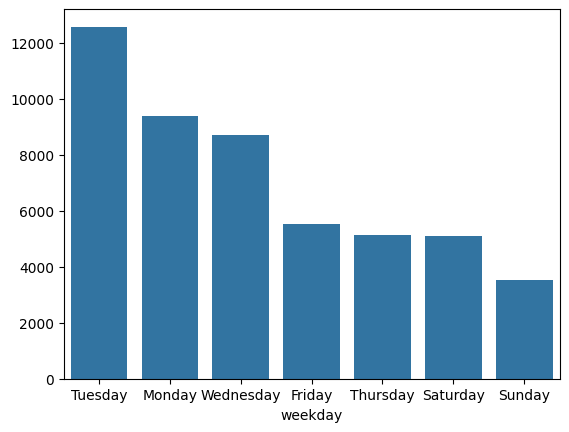

In [9]:
import seaborn as sns

counts = df["weekday"].value_counts()

sns.barplot(x = counts.index, y = counts.values)

<Axes: xlabel='hour', ylabel='Lat'>

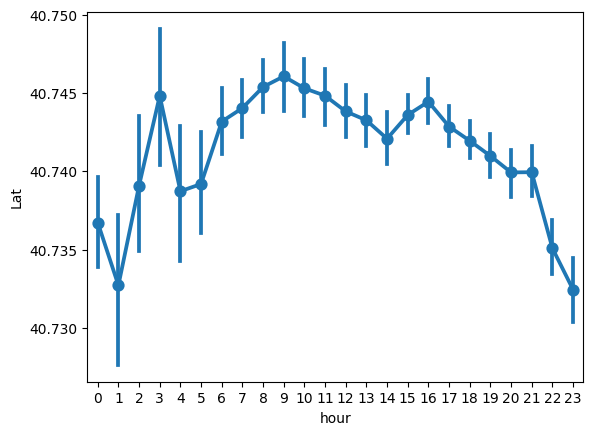

In [10]:
sns.pointplot(x = "hour", y = "Lat", data = df)

<Axes: xlabel='hour', ylabel='Lat'>

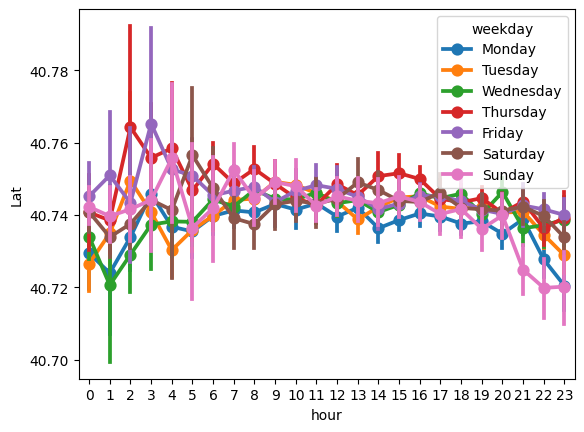

In [11]:
sns.pointplot(x = "hour", y = "Lat", hue = "weekday", data = df)

In [12]:
test = [100,200,300,400]

for i,angka in enumerate(test, 1): # enumerate untuk memberikan angka baru
    print(f"{i} = {angka}")

1 = 100
2 = 200
3 = 300
4 = 400


ASSIGNMENT

In [13]:
df.head(50000)

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour,year
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0,2014
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0,2014
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0,2014
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0,2014
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0,2014
...,...,...,...,...,...,...,...,...,...,...
49995,2014-09-03 15:59:00,40.7429,-73.9357,B02598,Wednesday,3,59,9,15,2014
49996,2014-09-03 15:59:00,40.7515,-73.9938,B02598,Wednesday,3,59,9,15,2014
49997,2014-09-03 16:00:00,40.7651,-73.9750,B02598,Wednesday,3,0,9,16,2014
49998,2014-09-03 16:00:00,40.7131,-73.9973,B02598,Wednesday,3,0,9,16,2014


9.1

<Axes: ylabel='Base'>

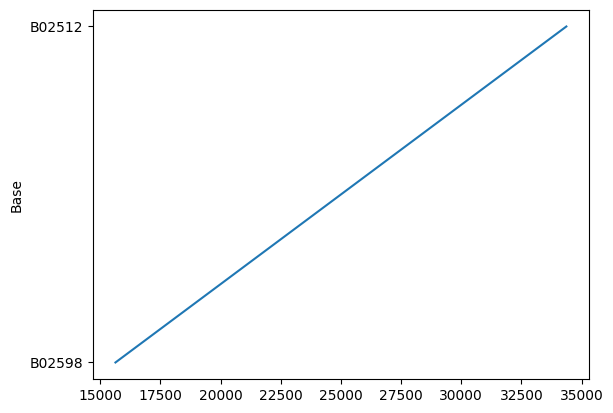

In [14]:
import seaborn as sns

counts = df["Base"].value_counts()

sns.lineplot(y = counts.index, x = counts.values)

9.2

<Axes: xlabel='Base', ylabel='count'>

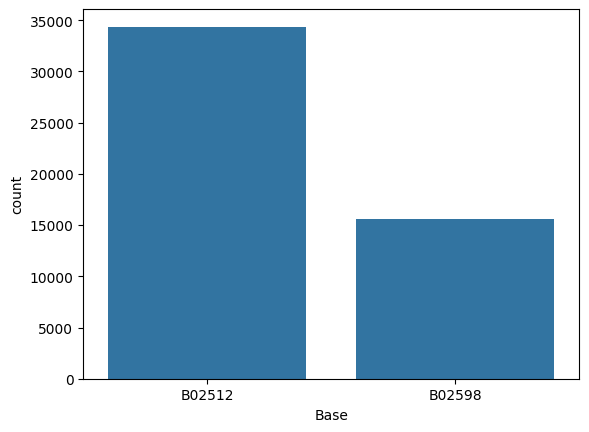

In [15]:
sns.countplot(x = "Base", data = df)